In [1]:
# libabries for data exploration.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helpful_functions import MLFunctions

# time series specific libararies
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.offsetbox import AnchoredText
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

In [2]:
# load sales data.
sales = pd.read_csv("../../../Data/future_sales/sales_train.csv",
                    usecols=['date', 'shop_id', 'item_id', 'item_price', 'item_cnt_day'],
                    index_col='date')

In [5]:
sales.index = pd.to_datetime(sales.index, format="%d.%m.%Y")
sales = sales.sort_index()

In [7]:
helper_function = MLFunctions(sales)
arr = helper_function.dateNum()
sales['time'] = arr

In [ ]:
sales.groupby('shop_id')

In [79]:
test = sales.groupby(['time', 'shop_id']).sum()[['item_price', 'item_cnt_day']]

In [80]:
test

item_price  item_cnt_day
time shop_id                          
0    2           31287.0          24.0
     7           58595.0          89.0
     8           43118.0          50.0
     13           5804.0          31.0
     14          43673.0          66.0
...                  ...           ...
1033 55          38268.0         137.0
     56          48622.0          67.0
     57         105070.0         121.0
     58          85774.0          82.0
     59          43223.0          56.0

[47228 rows x 2 columns]

In [83]:
test2 = sales.groupby(['time', 'shop_id']).count()[['item_id']]
test2

item_id
time shop_id         
0    2             23
     7             87
     8             48
     13            28
     14            60
...               ...
1033 55            49
     56            61
     57           110
     58            71
     59            51

[47228 rows x 1 columns]

In [85]:
test3 = pd.concat([test, test2], axis=1)
test3

item_price  item_cnt_day  item_id
time shop_id                                   
0    2           31287.0          24.0       23
     7           58595.0          89.0       87
     8           43118.0          50.0       48
     13           5804.0          31.0       28
     14          43673.0          66.0       60
...                  ...           ...      ...
1033 55          38268.0         137.0       49
     56          48622.0          67.0       61
     57         105070.0         121.0      110
     58          85774.0          82.0       71
     59          43223.0          56.0       51

[47228 rows x 3 columns]

In [92]:
test3 = test3.reset_index()

In [8]:
sales.head()

,shop_id,item_id,item_price,item_cnt_day,time
date,,,,,
2013-01-01,18,5823,2500.0,1.0,0
2013-01-01,27,5573,849.0,1.0,0
2013-01-01,7,1006,399.0,1.0,0
2013-01-01,19,17707,899.0,1.0,0
2013-01-01,14,19548,149.0,1.0,0


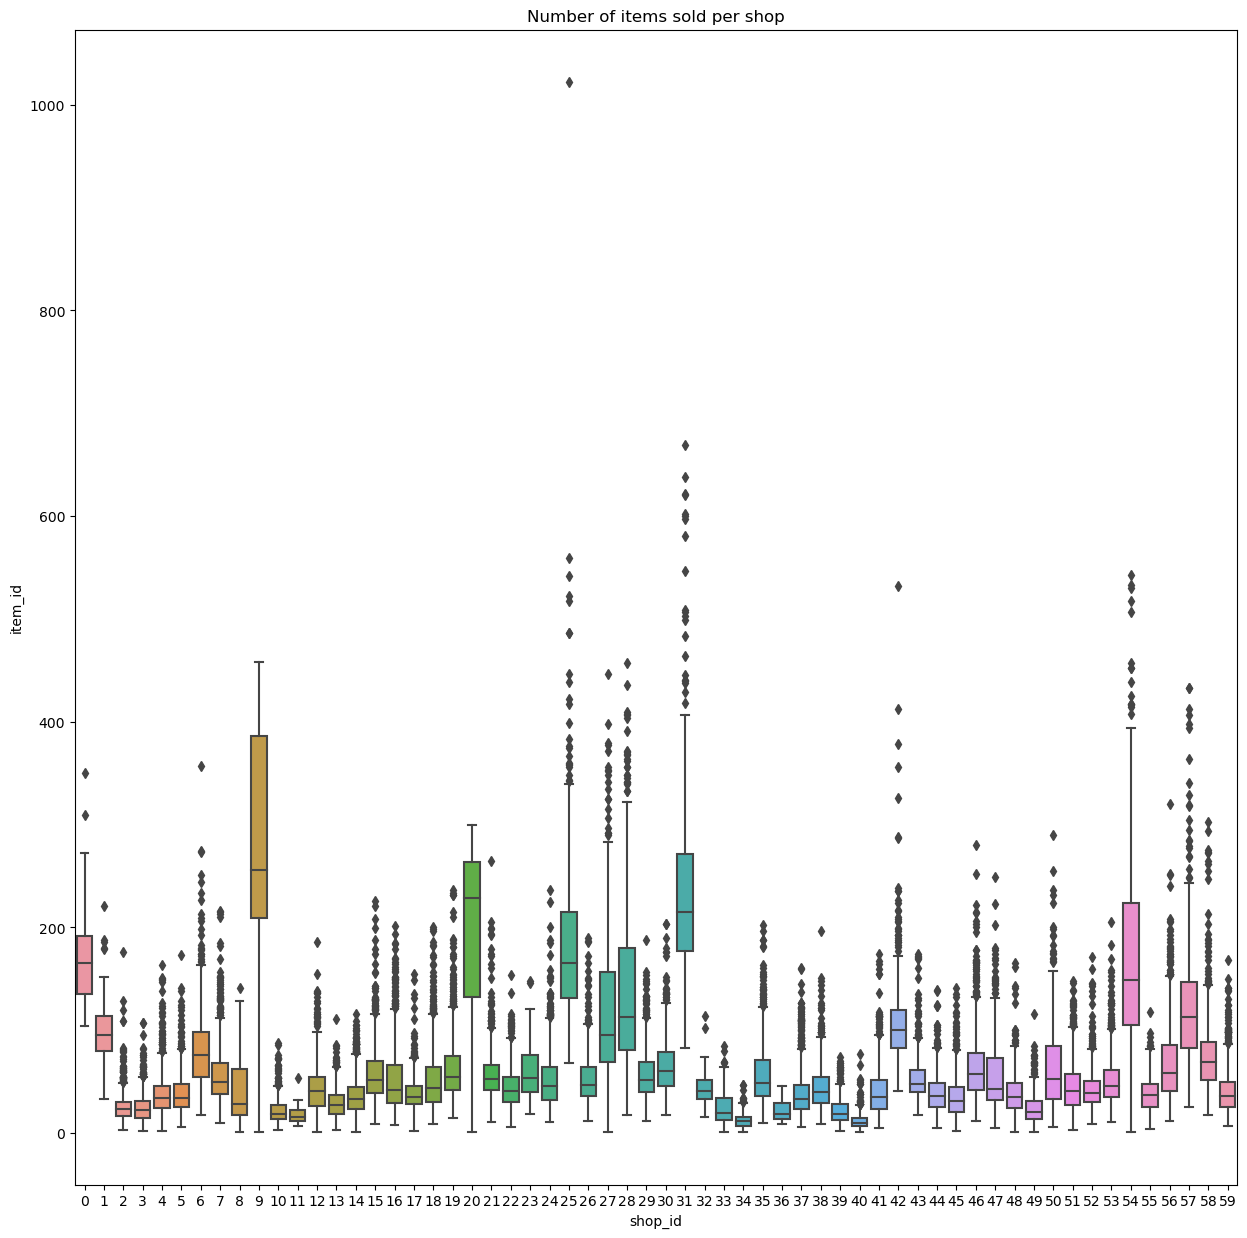

In [98]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=test3, x='shop_id', y='item_id')
ax.set_title('Number of items sold per shop')
plt.show()